In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")

In [49]:
df=pd.read_csv("D:/Final Project/archive (4)/2022/heart_data.csv")
display(HTML(df.head(10).to_html()))

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [51]:
duplicates = df[df.duplicated()]
duplicates

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [52]:
df.drop_duplicates(inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [53]:
# Our Observation from the dataset
# Total Samle:  319795
# Total Duplicates : 18078
# The majority of features are categorical.

In [56]:
# Get unique values for the columns

unique_race = df['Race'].unique()
unique_general_health = df['GenHealth'].unique()
unique_diabetic = df['Diabetic'].unique()

print("Unique values in 'race' column:", unique_race)
print("Unique values in 'general health' column:", unique_general_health)
print("Unique values in 'diabetic' column:", unique_diabetic)


Unique values in 'race' column: ['3' '2' '1' '0' '5' '4']
Unique values in 'general health' column: ['3' '1' '2' '0' '4']
Unique values in 'diabetic' column: ['1' '0' '3' '4']


In [57]:
def categorize_bmi(BMI):
    if BMI <= 18.5:
        return 0
    elif 18.5 < BMI <= 25:
        return 1
    elif 25 < BMI <= 30:
        return 2
    elif BMI > 30:
        return 3
        
df['BMI'] = df['BMI'].apply(categorize_bmi)

In [58]:
df['AgeCategory']=df['AgeCategory'].replace('18-24','0')
df['AgeCategory']=df['AgeCategory'].replace('25-29','1')
df['AgeCategory']=df['AgeCategory'].replace('30-34','2')
df['AgeCategory']=df['AgeCategory'].replace('35-39','3')
df['AgeCategory']=df['AgeCategory'].replace('40-44','4')
df['AgeCategory']=df['AgeCategory'].replace('45-49','5')
df['AgeCategory']=df['AgeCategory'].replace('50-54','6')
df['AgeCategory']=df['AgeCategory'].replace('55-59','7')
df['AgeCategory']=df['AgeCategory'].replace('60-64','8')
df['AgeCategory']=df['AgeCategory'].replace('65-69','9')
df['AgeCategory']=df['AgeCategory'].replace('70-74','10')
df['AgeCategory']=df['AgeCategory'].replace('75-79','11')
df['AgeCategory']=df['AgeCategory'].replace('80 or older','12')

In [59]:
df['GenHealth']=df['GenHealth'].replace('Poor','0')
df['GenHealth']=df['GenHealth'].replace('Fair','1')
df['GenHealth']=df['GenHealth'].replace('Good','2')
df['GenHealth']=df['GenHealth'].replace('Very good','3')
df['GenHealth']=df['GenHealth'].replace('Excellent','4')

df['Race']=df['Race'].replace('American Indian/Alaskan Native','0')
df['Race']=df['Race'].replace('Asian','1')
df['Race']=df['Race'].replace('Black','2')
df['Race']=df['Race'].replace('White','3')
df['Race']=df['Race'].replace('Hispanic','4')
df['Race']=df['Race'].replace('Other','5')

df=df.replace('No','0')
df= df.replace('Yes','1')
df["Diabetic"]=df['Diabetic'].replace('No, borderline diabetes','3')
df["Diabetic"]=df['Diabetic'].replace('Yes (during pregnancy)','4')

df=df.replace('Female','0')
df= df.replace('Male','1')

display(HTML(df.head(10).to_html()))

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0,1,0,0,3.0,30.0,0,0,7,3,1,1,3,5.0,1,0,1
1,0,1,0,0,1,0.0,0.0,0,0,12,3,0,1,3,7.0,0,0,0
2,0,2,1,0,0,20.0,30.0,0,1,9,3,1,1,1,8.0,1,0,0
3,0,1,0,0,0,0.0,0.0,0,0,11,3,0,0,2,6.0,0,0,1
4,0,1,0,0,0,28.0,0.0,1,0,4,3,0,1,3,8.0,0,0,0
5,1,2,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,1,0,0,0,15.0,0.0,0,0,10,3,0,1,1,4.0,1,0,1
7,0,3,1,0,0,5.0,0.0,1,0,12,3,1,0,2,9.0,1,0,0
8,0,2,0,0,0,0.0,0.0,0,0,12,3,3,0,1,5.0,0,1,0
9,0,3,0,0,0,0.0,0.0,1,1,9,3,0,1,2,10.0,0,0,0


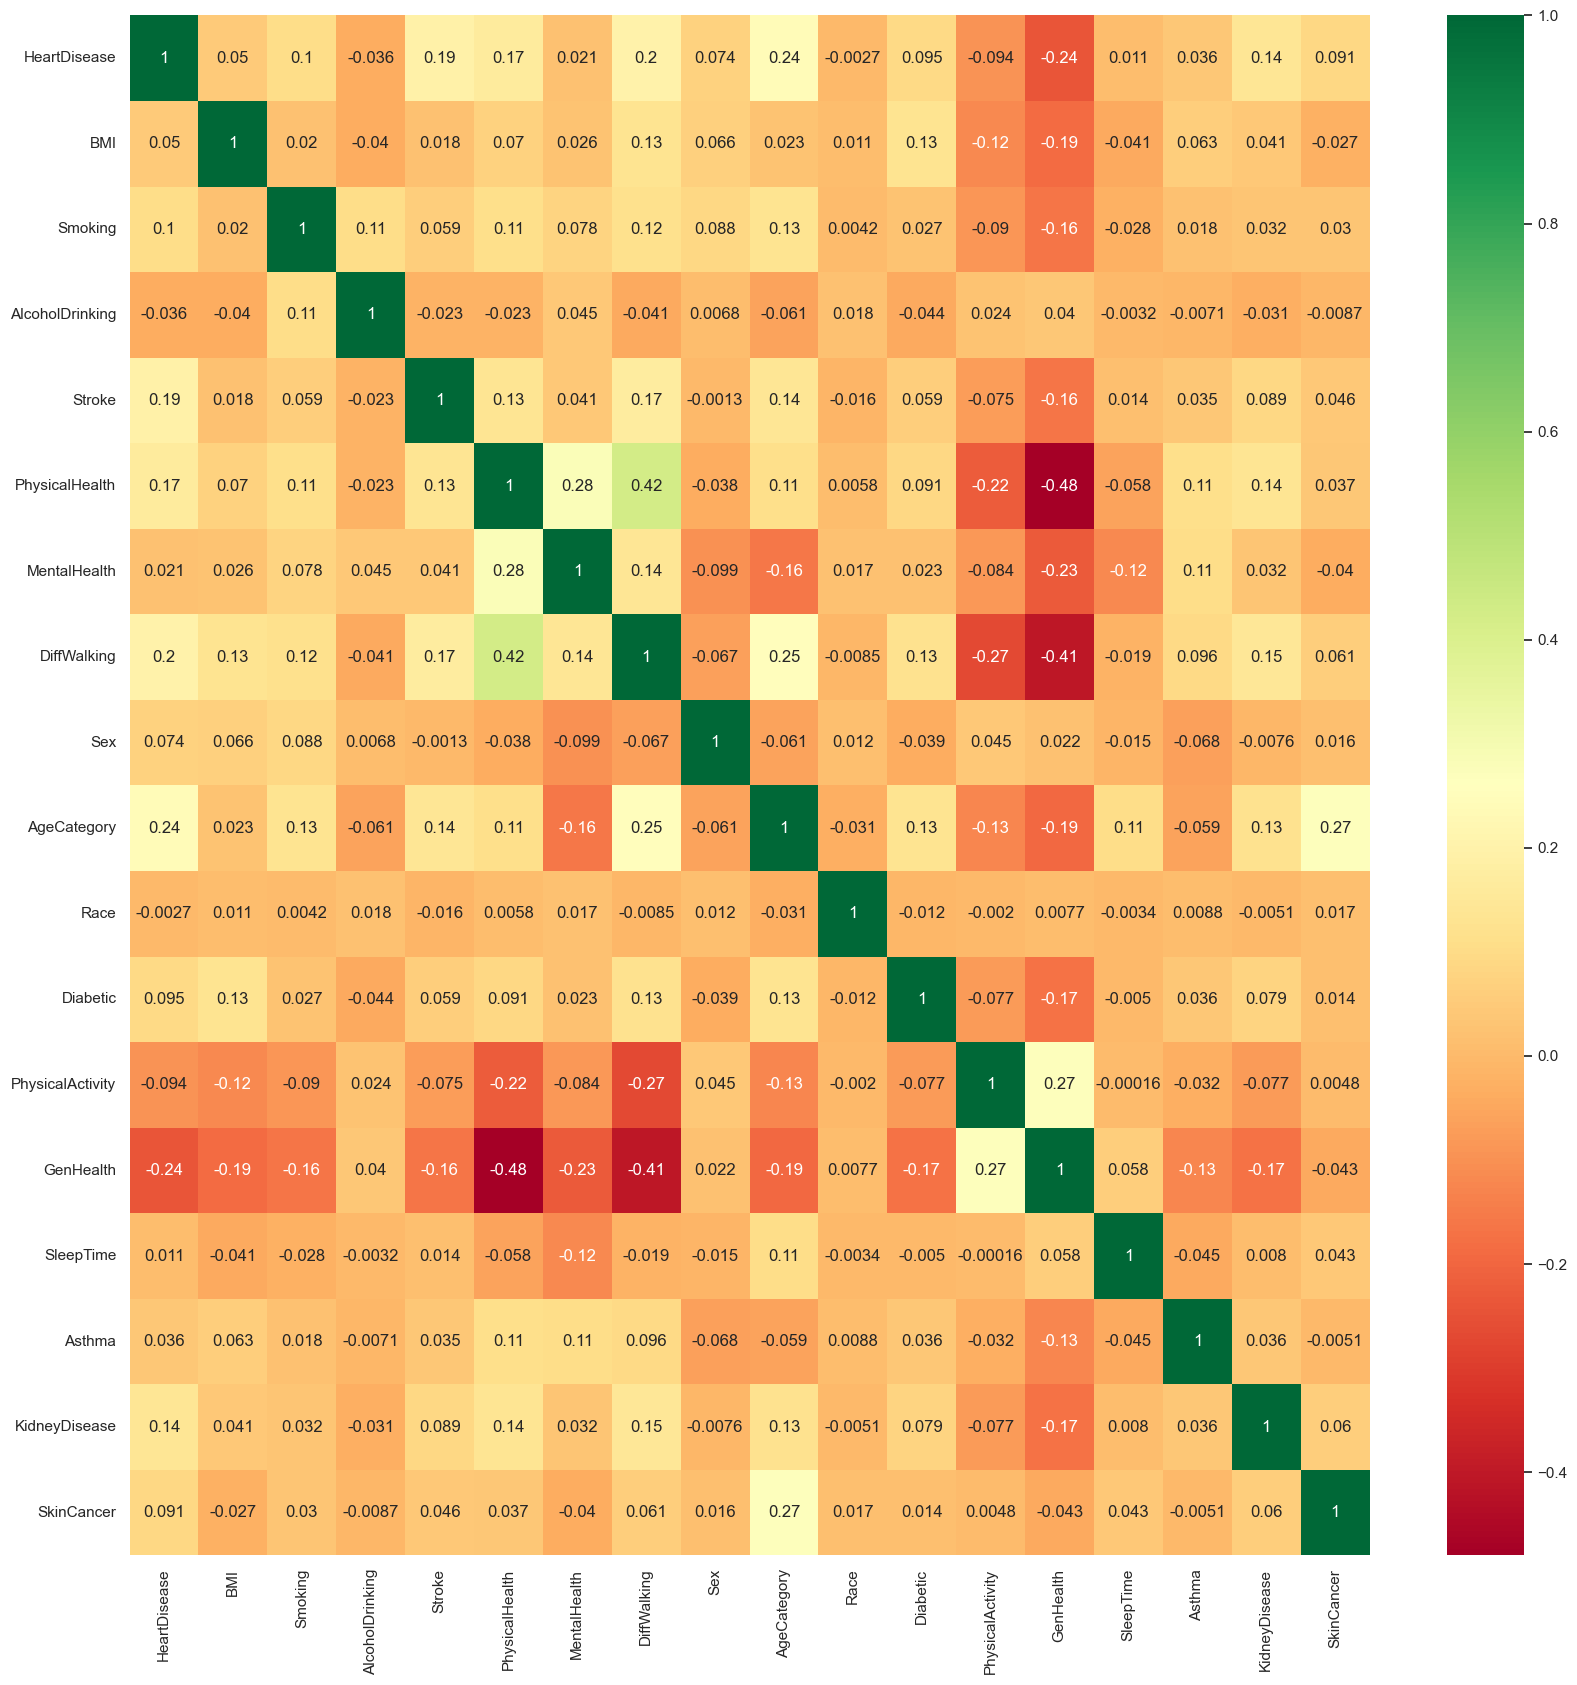

In [60]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

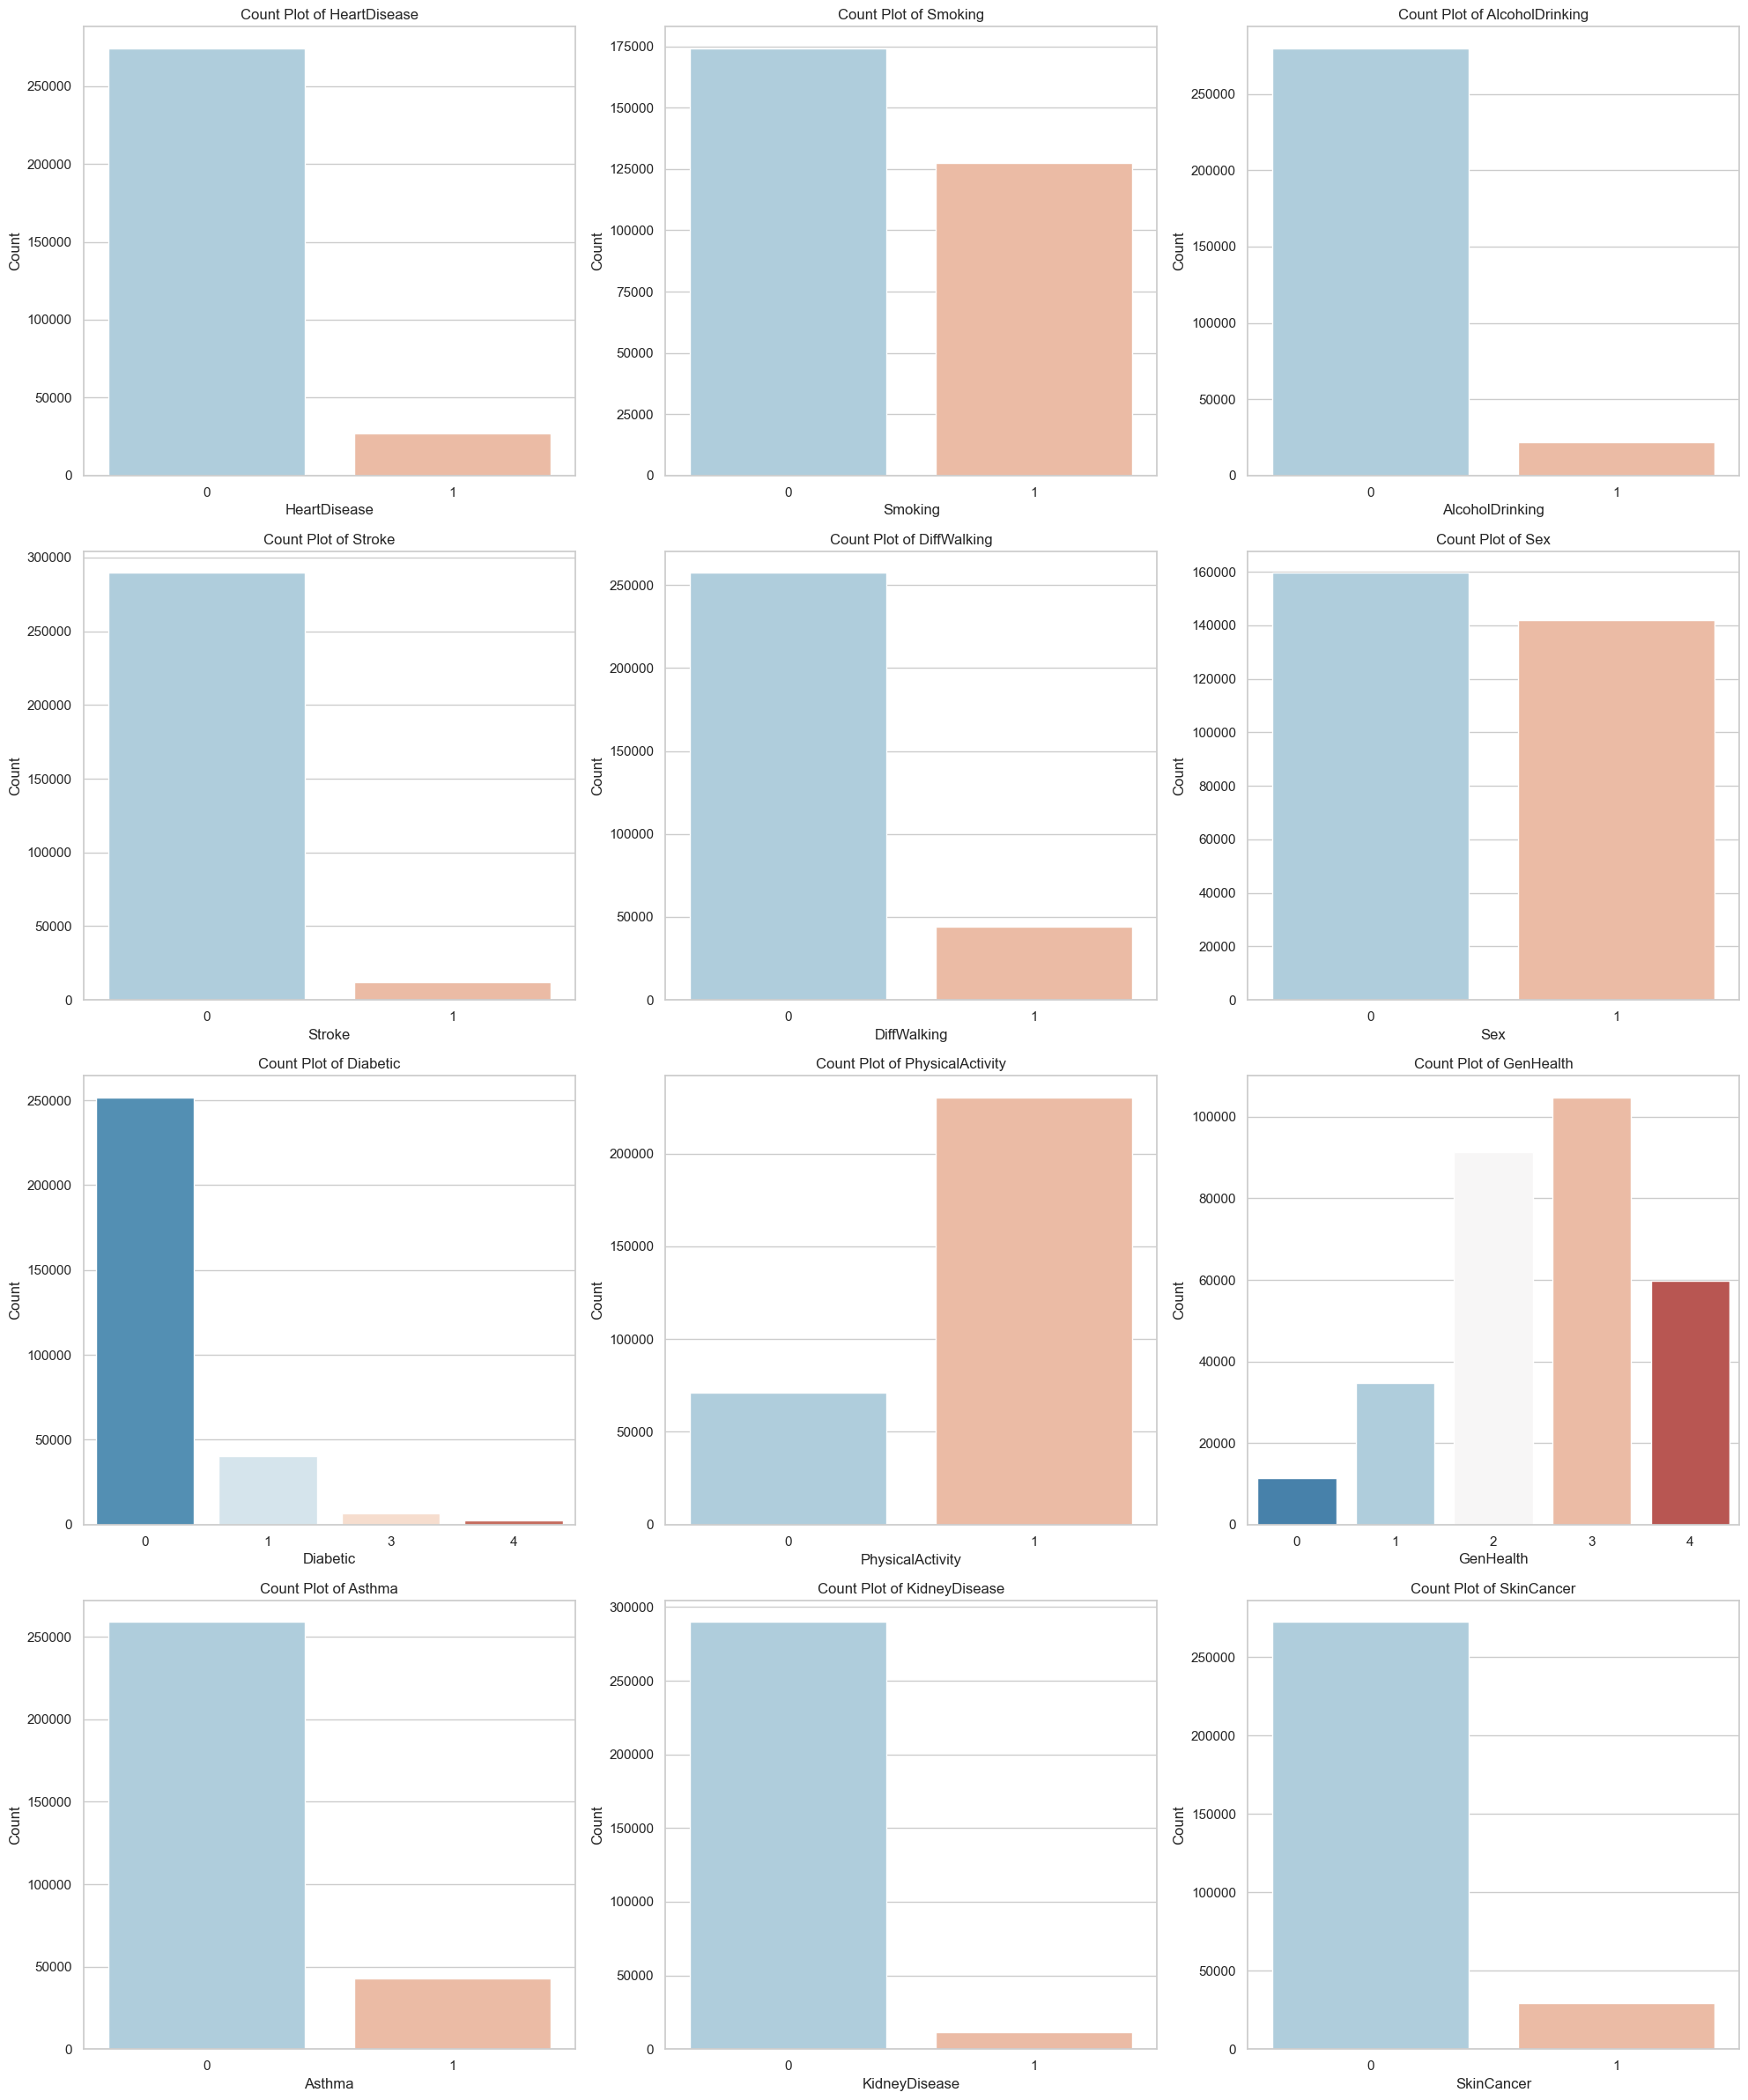

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = [
    'HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
    'KidneyDisease', 'SkinCancer']

sns.set_style('whitegrid')

plt.figure(figsize=(20, 24))
for i, column in enumerate(columns_to_plot, 1): 
    # Find the order for the current column by sorting its unique values
    order = sorted(df[column].unique())
    
    # Create the subplot
    plt.subplot(4, 3, i)
    
    # Generate the countplot with ordered X-axis
    sns.countplot(x=column, data=df, order=order, palette='RdBu_r')
    
    # Set the title and labels
    plt.title(f'Count Plot of {column}')
    plt.ylabel('Count')

# Adjust subplots layout
plt.tight_layout()
plt.show()

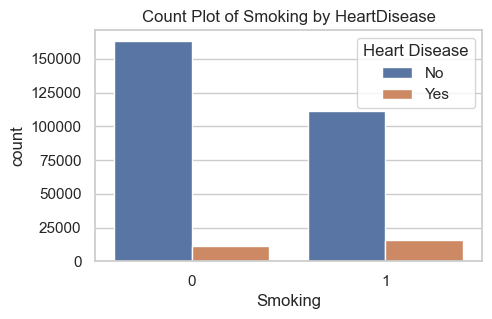

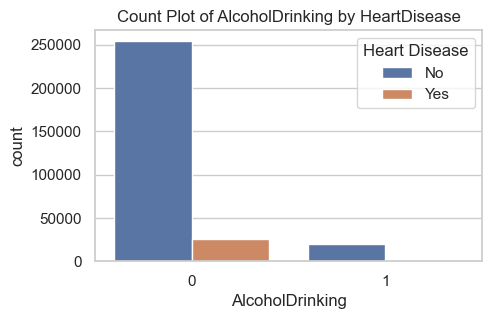

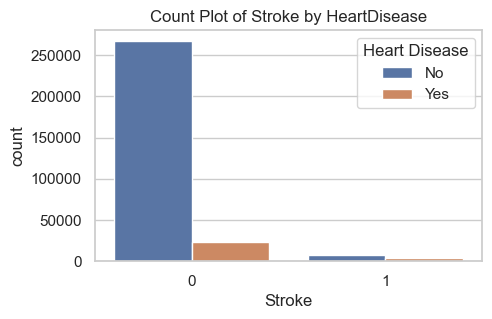

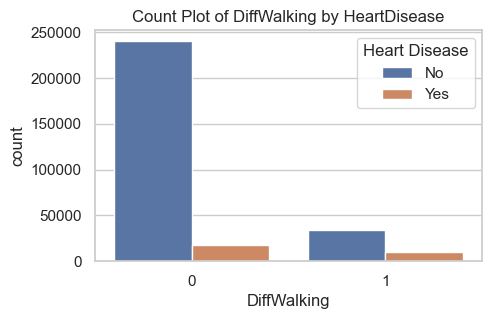

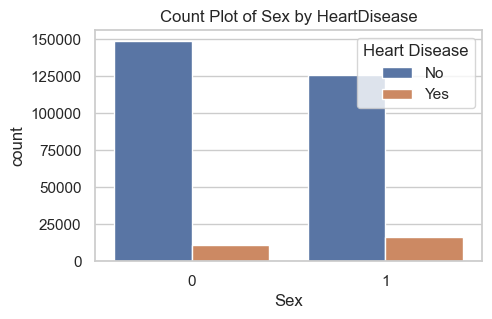

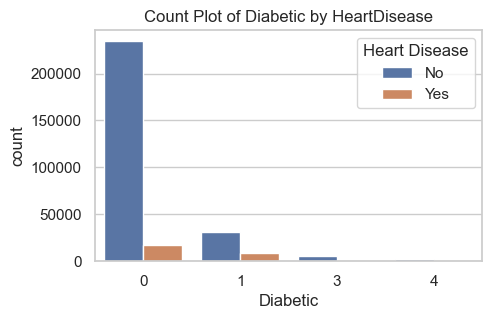

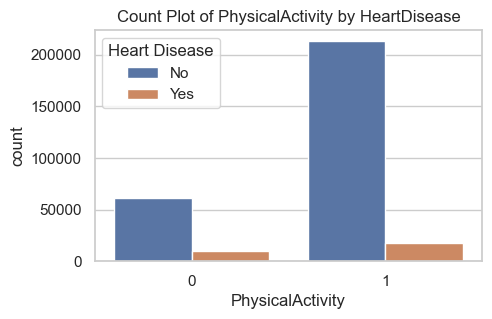

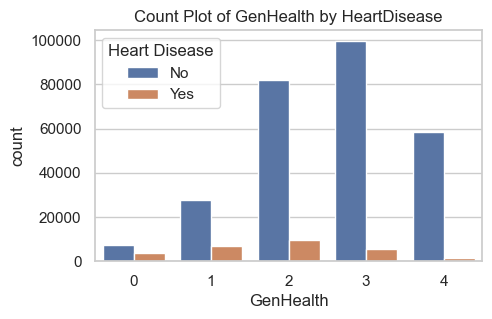

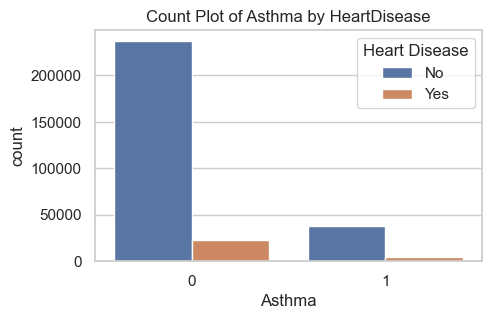

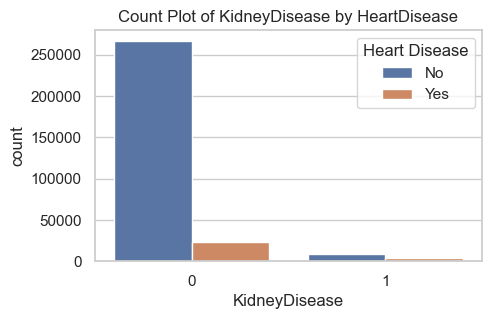

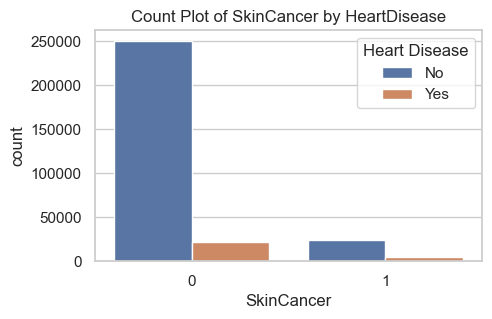

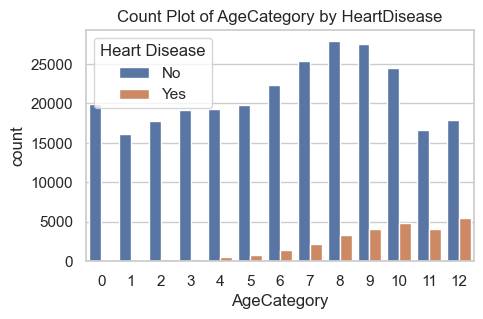

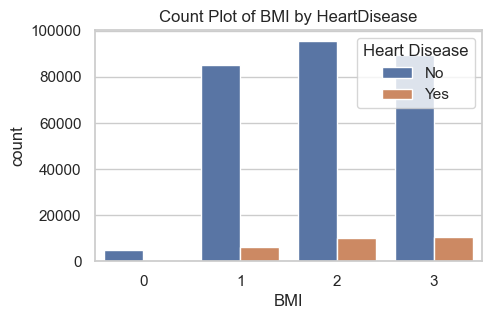

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['AgeCategory'] = pd.to_numeric(df['AgeCategory'])

# List of features to plot against 'HeartDisease'
features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 
            'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 
            'SkinCancer','AgeCategory', 'BMI']

# Setting the style
sns.set(style="whitegrid")

# Loop through the list of features
for feature in features:
    order = df[feature].value_counts().index.sort_values()
    plt.figure(figsize=(5, 3))
    sns.countplot(x=feature, data=df, hue='HeartDisease', order=order)
    plt.title(f'Count Plot of {feature} by HeartDisease')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
    plt.show()


In [13]:
# There is a severe class imbalance (heart disease vs healthy)
# Imbalanced attributes : HeartDisease, Alcohol drinking, Sroke, DiffWalking, Race, Diabetic, PhysicalActivity, Asthma, KidneyDisease, SkinCancer.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)


col = list(df.columns)
categorical_features = []
numerical_features = []
for i in df1.columns:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        df1[i]=le.fit_transform(df1[i])
        categorical_features.append(i)

In [15]:
df_corr=df.drop("Race", axis=1)

df_corr['HeartDisease']=df_corr['HeartDisease'].astype(float)
df_corr['Smoking']=df_corr['Smoking'].astype(float)
df_corr['AlcoholDrinking']=df_corr['AlcoholDrinking'].astype(float)
df_corr['Stroke']=df_corr['Stroke'].astype(float)
df_corr['DiffWalking']=df_corr['DiffWalking'].astype(float)
df_corr['Sex']=df_corr['Sex'].astype(float)
df_corr['AgeCategory']=df_corr['AgeCategory'].astype(float)
df_corr['Diabetic']=df_corr['Diabetic'].astype(float)
df_corr['PhysicalActivity']=df_corr['PhysicalActivity'].astype(float)
df_corr['GenHealth']=df_corr['GenHealth'].astype(float)
df_corr['Asthma']=df_corr['Asthma'].astype(float)
df_corr['KidneyDisease']=df_corr['KidneyDisease'].astype(float)
df_corr['SkinCancer']=df_corr['SkinCancer'].astype(float)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int32  
 1   BMI               301717 non-null  int64  
 2   Smoking           301717 non-null  int32  
 3   AlcoholDrinking   301717 non-null  int32  
 4   Stroke            301717 non-null  int32  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int32  
 8   Sex               301717 non-null  int32  
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  int32  
 11  Diabetic          301717 non-null  int32  
 12  PhysicalActivity  301717 non-null  int32  
 13  GenHealth         301717 non-null  int32  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int32  
 16  KidneyDisease     301717 

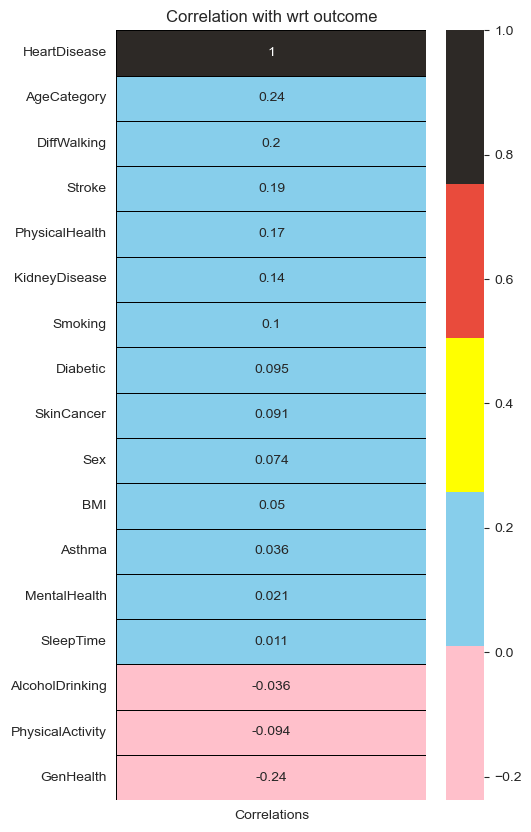

In [22]:
colors = ["Pink",'SkyBlue',"Yellow",'#E94B3C','#2D2926']

corr=df_corr.corrwith(df_corr['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns=['Correlations']
plt.subplots(figsize=(5,10))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation with wrt outcome')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df1.drop('HeartDisease', axis=1)
y = df1['HeartDisease']

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg = LogisticRegression()
# Train the model
logreg.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=0)
# Train the model
rf.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = rf.predict(X_test)

pos_label = 1

# Calculate metrics for Logistic Regression
imbalanced_logreg_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logreg),
    "Precision": precision_score(y_test, y_pred_logreg, pos_label=pos_label),
    "Recall": recall_score(y_test, y_pred_logreg, pos_label=pos_label),
    "F1-Score": f1_score(y_test, y_pred_logreg, pos_label=pos_label),
    "AUC": roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
}

# Calculate metrics for Random Forest
imbalanced_rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, pos_label=pos_label),
    "Recall": recall_score(y_test, y_pred_rf, pos_label=pos_label),
    "F1-Score": f1_score(y_test, y_pred_rf, pos_label=pos_label),
    "AUC": roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
}

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [25]:
display(imbalanced_logreg_metrics)
display(cm_logreg)

{'Accuracy': 0.9105793450881612,
 'Precision': 0.5340236686390533,
 'Recall': 0.10560187216615474,
 'F1-Score': 0.17633410672853828,
 'AUC': 0.829571216956767}

array([[67963,   630],
       [ 6115,   722]], dtype=int64)

In [26]:
display(imbalanced_rf_metrics)
display(cm_rf)

{'Accuracy': 0.9011533872464537,
 'Precision': 0.36857749469214435,
 'Recall': 0.12695626736872898,
 'F1-Score': 0.18885987815491734,
 'AUC': 0.7821740575700927}

array([[67106,  1487],
       [ 5969,   868]], dtype=int64)

In [27]:
balanced_logreg = LogisticRegression(class_weight='balanced', random_state=0)
balanced_logreg.fit(X_train_scaled, y_train)

#train the balanced Random Forest model
balanced_rf = RandomForestClassifier(class_weight='balanced', random_state=0)
balanced_rf.fit(X_train, y_train)

# Make predictions with both balanced models
y_pred_balanced_logreg = balanced_logreg.predict(X_test_scaled)
y_pred_balanced_rf = balanced_rf.predict(X_test)

# Calculate performance metrics for both balanced models
balanced_metrics_logreg = {
    "Accuracy": accuracy_score(y_test, y_pred_balanced_logreg),
    "Precision": precision_score(y_test, y_pred_balanced_logreg),
    "Recall": recall_score(y_test, y_pred_balanced_logreg),
    "F1-Score": f1_score(y_test, y_pred_balanced_logreg),
    "AUC": roc_auc_score(y_test, balanced_logreg.predict_proba(X_test_scaled)[:, 1])
}

balanced_metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_balanced_rf),
    "Precision": precision_score(y_test, y_pred_balanced_rf),
    "Recall": recall_score(y_test, y_pred_balanced_rf),
    "F1-Score": f1_score(y_test, y_pred_balanced_rf),
    "AUC": roc_auc_score(y_test, balanced_rf.predict_proba(X_test)[:, 1])
}

In [28]:
display(balanced_metrics_logreg)

{'Accuracy': 0.7401034071324407,
 'Precision': 0.22519264712213183,
 'Recall': 0.7651016527716835,
 'F1-Score': 0.34796780416417217,
 'AUC': 0.8299289261450331}

In [29]:
display(balanced_metrics_rf)

{'Accuracy': 0.8674797825798753,
 'Precision': 0.23023057216054654,
 'Recall': 0.19716249817171275,
 'F1-Score': 0.21241727072171449,
 'AUC': 0.7573243336511979}

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Initialize and train the Logistic Regression model with SMOTE
smote_logreg = LogisticRegression(random_state=0)
smote_logreg.fit(X_train_smote, y_train_smote)

# Initialize and train the Random Forest model with SMOTE
smote_rf = RandomForestClassifier(random_state=0)
smote_rf.fit(X_train_smote, y_train_smote)

# Make predictions with both balanced models
y_pred_smote_logreg = smote_logreg.predict(X_test_scaled)
y_pred_smote_rf = smote_rf.predict(X_test_scaled)

# Calculate performance metrics for both balanced models
smote_metrics_logreg = {
    "Accuracy": accuracy_score(y_test, y_pred_smote_logreg),
    "Precision": precision_score(y_test, y_pred_smote_logreg),
    "Recall": recall_score(y_test, y_pred_smote_logreg),
    "F1-Score": f1_score(y_test, y_pred_smote_logreg),
    "AUC": roc_auc_score(y_test, smote_logreg.predict_proba(X_test_scaled)[:, 1])
}

smote_metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_smote_rf),
    "Precision": precision_score(y_test, y_pred_smote_rf),
    "Recall": recall_score(y_test, y_pred_smote_rf),
    "F1-Score": f1_score(y_test, y_pred_smote_rf),
    "AUC": roc_auc_score(y_test, smote_rf.predict_proba(X_test_scaled)[:, 1])
}

In [31]:
display(smote_metrics_logreg)

{'Accuracy': 0.7401299217817844,
 'Precision': 0.22497522299306244,
 'Recall': 0.763639022963288,
 'F1-Score': 0.34755691652243376,
 'AUC': 0.8287304431049297}

In [32]:
display(smote_metrics_rf)

{'Accuracy': 0.8791329709664589,
 'Precision': 0.290979097909791,
 'Recall': 0.23211935059236508,
 'F1-Score': 0.2582377349279961,
 'AUC': 0.7786520640545156}

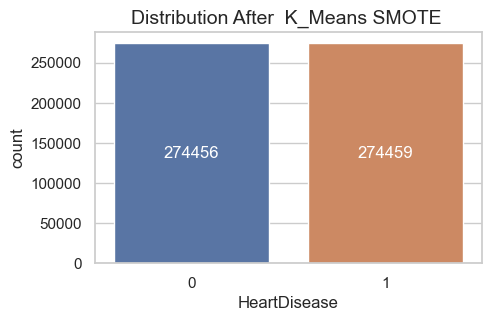

In [73]:
from  imblearn.over_sampling import KMeansSMOTE

KSMOTE  = KMeansSMOTE(cluster_balance_threshold=0.1)
X_KSMOTE, y_KSMOTE = KSMOTE.fit_resample(X, y)


plt.figure(figsize = (5,3))
ax=sns.countplot( x = y_KSMOTE )
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Distribution After  K_Means SMOTE ", size=14)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,  y_test = train_test_split(X_KSMOTE, y_KSMOTE , test_size=0.25, random_state=0)

scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_s=LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000)
logreg_s.fit(X_train_scaled,y_train)
y_pred_log=logreg_s.predict(X_test_scaled)

y_pred_proba_log = logreg_s.predict_proba(X_test_scaled)


KSMOTE_log_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_log),  
    "Precision": precision_score(y_test, y_pred_log), 
    "Recall": recall_score(y_test, y_pred_log), 
    "F1-Score": f1_score(y_test, y_pred_log),  
    "AUC": roc_auc_score(y_test, y_pred_proba_log[:, 1]) 
}

display(KSMOTE_log_metrics)

{'Accuracy': 0.9036865385596339,
 'Precision': 0.9053528620709816,
 'Recall': 0.9018331658876804,
 'F1-Score': 0.9035895864790541,
 'AUC': 0.9569976186746174}

In [74]:
df_logreg = pd.DataFrame([imbalanced_logreg_metrics], index=['LogReg_Imbalanced'])
df_rf = pd.DataFrame([imbalanced_rf_metrics], index=['RF_Imbalanced'])
df_balanced_logreg = pd.DataFrame([balanced_metrics_logreg], index=['LogReg_Balanced'])
df_imbalanced_rf = pd.DataFrame([balanced_metrics_logreg], index=['RF_Balanced'])
df_smote_logreg = pd.DataFrame([smote_metrics_logreg], index=['LogReg_Smote'])
df_smote_rf = pd.DataFrame([smote_metrics_rf], index=['RF_Smote'])
df_KSMOTE_logreg = pd.DataFrame([KSMOTE_log_metrics], index=['LogReg_KSmote'])

simple_model = pd.concat([df_logreg, df_rf, df_balanced_logreg, df_imbalanced_rf, df_smote_logreg, df_smote_rf,df_KSMOTE_logreg])
compare_model = simple_model.transpose()

compare_model

,LogReg_Imbalanced,RF_Imbalanced,LogReg_Balanced,RF_Balanced,LogReg_Smote,RF_Smote,LogReg_KSmote
Accuracy,0.910579,0.901153,0.740103,0.740103,0.740130,0.879133,0.903687
Precision,0.534024,0.368577,0.225193,0.225193,0.224975,0.290979,0.905353
Recall,0.105602,0.126956,0.765102,0.765102,0.763639,0.232119,0.901833
F1-Score,0.176334,0.188860,0.347968,0.347968,0.347557,0.258238,0.903590
AUC,0.829571,0.782174,0.829929,0.829929,0.828730,0.778652,0.956998


In [39]:
import pickle

In [40]:
projectfile = 'trained_model.sav'
pickle.dump(logreg_s, open(projectfile, 'wb'))

In [69]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))